# Equity Selection

In [1]:
import yfinance as yf
import pandas as pd

# Read and print the stock tickers that make up the S&P 500 - from https://gist.github.com/quantra-go-algo/ac5180bf164a7894f70969fa563627b2

tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
look_back_window = 10 * 7
data_look_back = '6mo'

tickers

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [2]:
sp_500_data = yf.download(tickers["Symbol"].to_list(), period=data_look_back, interval='1h',
                          auto_adjust=True)
sp_500_data

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
['BRK.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")')
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=6mo)')


Price                     Adj Close             Close                          \
Ticker                         BF.B BRK.B           A        AAPL        ABBV   
2024-08-08 13:30:00+00:00       NaN   NaN  136.470001  212.559998  189.350006   
2024-08-08 14:30:00+00:00       NaN   NaN  135.990005  212.210007  189.320007   
2024-08-08 15:30:00+00:00       NaN   NaN  136.279999  213.250000  189.770004   
2024-08-08 16:30:00+00:00       NaN   NaN  136.889999  213.897598  189.809998   
2024-08-08 17:30:00+00:00       NaN   NaN  136.289993  212.979996  190.399994   
...                             ...   ...         ...         ...         ...   
2025-02-07 16:30:00+00:00       NaN   NaN  145.044998  228.400604  192.414993   
2025-02-07 17:30:00+00:00       NaN   NaN  145.485001  229.298904  191.875000   
2025-02-07 18:30:00+00:00       NaN   NaN  145.410004  227.880005  191.554993   
2025-02-07 19:30:00+00:00       NaN   NaN  145.164993  228.000000  190.770004   
2025-02-07 20:30:00+00:00       NaN   NaN  145.220001  227.710007  190.600006   

Price                                                                     \
Ticker                           ABNB         ABT       ACGL         ACN   
2024-08-08 13:30:00+00:00  114.345001  110.718697  97.595001  318.350006   
2024-08-08 14:30:00+00:00  115.104103  109.889999  98.160004  316.630005   
2024-08-08 15:30:00+00:00  115.760002  109.735001  98.000000  315.600006   
2024-08-08 16:30:00+00:00  115.555000  110.010002  98.339996  316.149994   
2024-08-08 17:30:00+00:00  115.040001  109.915001  98.392502  316.359985   
...                               ...         ...        ...         ...   
2025-02-07 16:30:00+00:00  135.259995  129.100006  93.720001  386.809998   
2025-02-07 17:30:00+00:00  135.360001  129.190002  93.599998  388.459991   
2025-02-07 18:30:00+00:00  134.420807  129.150299  93.370003  387.285004   
2025-02-07 19:30:00+00:00  135.054993  129.020004  93.379997  386.589996   
2025-02-07 20:30:00+00:00  134.990005  129.080002  93.529999  386.040009   

Price                                  ...    Volume                      \
Ticker                           ADBE  ...       WTW        WY      WYNN   
2024-08-08 13:30:00+00:00  525.929993  ...   37686.0  268959.0  422907.0   
2024-08-08 14:30:00+00:00  525.299988  ...   38680.0  237362.0  239772.0   
2024-08-08 15:30:00+00:00  526.760010  ...   20034.0  221340.0  227407.0   
2024-08-08 16:30:00+00:00  527.630005  ...   17789.0  169695.0  336222.0   
2024-08-08 17:30:00+00:00  530.085022  ...   26025.0  226195.0  230516.0   
...                               ...  ...       ...       ...       ...   
2025-02-07 16:30:00+00:00  434.760010  ...   25033.0  159190.0  180138.0   
2025-02-07 17:30:00+00:00  435.299988  ...   29459.0   78786.0  165642.0   
2025-02-07 18:30:00+00:00  432.760010  ...   29451.0  120122.0  216391.0   
2025-02-07 19:30:00+00:00  432.850006  ...   44722.0  151024.0  250487.0   
2025-02-07 20:30:00+00:00  433.049988  ...  110510.0  435574.0  426347.0   

Price                                                                         \
Ticker                          XEL        XOM       XYL       YUM       ZBH   
2024-08-08 13:30:00+00:00  249777.0  1959713.0   86308.0  141498.0  180739.0   
2024-08-08 14:30:00+00:00  228098.0  1188224.0   95323.0  144836.0  290162.0   
2024-08-08 15:30:00+00:00  160329.0   942270.0   69902.0  121818.0  157799.0   
2024-08-08 16:30:00+00:00  183673.0   918240.0   85292.0   88577.0  146595.0   
2024-08-08 17:30:00+00:00  166258.0  1183434.0   74991.0   94216.0  201532.0   
...                             ...        ...       ...       ...       ...   
2025-02-07 16:30:00+00:00  276671.0   701945.0  166411.0  250000.0  278165.0   
2025-02-07 17:30:00+00:00  250520.0   629376.0  123018.0  253084.0  230304.0   
2025-02-07 18:30:00+00:00  240004.0   696073.0  153468.0  269036.0  284573.0   
2025-02-07 19:30:00+00:00  360521.0  1014577.0  258258.0  359556.0  342751.0   
2025-02-

In [3]:
rolling_avg_volume = sp_500_data["Volume"].rolling(window=look_back_window, min_periods=1).mean()
rolling_avg_volume

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
2024-08-08 13:30:00+00:00,97290.000000,1.020369e+07,628624.000000,1.905688e+06,576640.000000,77490.000000,387904.000000,276768.000000,447243.000000,177818.000000,...,37686.000000,268959.000000,422907.000000,249777.000000,1.959713e+06,86308.000000,141498.000000,180739.000000,202029.000000,250677.000000
2024-08-08 14:30:00+00:00,95586.500000,7.592010e+06,657085.500000,1.577208e+06,627766.500000,85769.000000,294046.000000,211095.500000,441326.500000,164430.500000,...,38183.000000,253160.500000,331339.500000,238937.500000,1.573968e+06,90815.500000,143167.000000,235450.500000,140541.500000,195503.500000
2024-08-08 15:30:00+00:00,82087.333333,6.551875e+06,586254.000000,1.310134e+06,613998.333333,79459.666667,249414.000000,183030.000000,414553.666667,152871.666667,...,32133.333333,242553.666667,296695.333333,212734.666667,1.363402e+06,83844.333333,136050.666667,209566.666667,114221.000000,175848.000000
2024-08-08 16:30:00+00:00,76760.750000,5.888284e+06,531869.750000,1.154941e+06,561856.250000,73071.250000,228246.000000,168357.750000,377769.250000,154625.250000,...,28547.250000,224339.000000,306577.000000,205469.250000,1.252112e+06,84206.250000,124182.250000,193823.750000,96021.500000,194372.250000
2024-08-08 17:30:00+00:00,80237.200000,5.504972e+06,513722.600000,1.031556e+06,519376.800000,74908.400000,216663.800000,164465.400000,377259.600000,151149.000000,...,28042.800000,224710.200000,291364.800000,197627.000000,1.238376e+06,82363.200000,118189.000000,195365.400000,86005.600000,183343.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-07 16:30:00+00:00,182473.900000,6.102824e+06,736352.957143,4.373321e+05,837969.028571,189157.771429,337498.085714,377525.914286,413566.485714,786995.300000,...,67175.271429,407673.642857,301238.228571,338260.814286,1.604694e+06,173738.171429,283938.142857,218171.528571,58674.457143,400613.514286
2025-02-07 17:30:00+00:00,182602.057143,6.119879e+06,733841.285714,4.374957e+05,833792.671429,188894.471429,338121.814286,378046.257143,415252.071429,789774.357143,...,67443.771429,406534.542857,302609.828571,340560.771429,1.598809e+06,174842.285714,285752.628571,219166.514286,59866.200000,400851.185714
2025-02-07 18:30:00+00:00,182820.371429,6.128213e+06,729158.285714,4.347952e+05,825487.614286,188514.814286,338728.614286,378099.557143,415678.285714,791466.785714,...,67703.828571,405612.314286,303944.542857,342134.857143,1.593759e+06,176381.442857,284546.871429,219190.357143,61234.685714,400911.914286
2025-02-07 19:30:00+00:00,182224.014286,6.123416e+06,726504.557143,4.361310e+05,822040.814286,189220.971429,337836.771429,378562.014286,415739.228571,796836.471429,...,68026.385714,405207.742857,306307.128571,345082.200000,1.596714e+06,179086.357143,286014.385714,220016.171429,62497.800000,400319.185714


In [4]:
sp_500_data.columns

MultiIndex([('Adj Close',  'BF.B'),
            ('Adj Close', 'BRK.B'),
            (    'Close',     'A'),
            (    'Close',  'AAPL'),
            (    'Close',  'ABBV'),
            (    'Close',  'ABNB'),
            (    'Close',   'ABT'),
            (    'Close',  'ACGL'),
            (    'Close',   'ACN'),
            (    'Close',  'ADBE'),
            ...
            (   'Volume',   'WTW'),
            (   'Volume',    'WY'),
            (   'Volume',  'WYNN'),
            (   'Volume',   'XEL'),
            (   'Volume',   'XOM'),
            (   'Volume',   'XYL'),
            (   'Volume',   'YUM'),
            (   'Volume',   'ZBH'),
            (   'Volume',  'ZBRA'),
            (   'Volume',   'ZTS')],
           names=['Price', 'Ticker'], length=2517)

In [5]:
sp_500_close_data = sp_500_data["Close"].dropna(axis=1, how="all").ffill()
sp_500_close_data

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
2024-08-08 13:30:00+00:00,136.470001,212.559998,189.350006,114.345001,110.718697,97.595001,318.350006,525.929993,209.089996,59.070000,...,277.410004,31.290001,76.815002,58.689999,117.269997,127.790001,137.839996,107.480003,309.209991,188.375000
2024-08-08 14:30:00+00:00,135.990005,212.210007,189.320007,115.104103,109.889999,98.160004,316.630005,525.299988,211.089996,58.910000,...,276.924988,31.200001,76.199997,58.290001,117.209999,127.849998,137.580002,107.839996,311.489990,187.574997
2024-08-08 15:30:00+00:00,136.279999,213.250000,189.770004,115.760002,109.735001,98.000000,315.600006,526.760010,211.669998,58.570000,...,276.437500,31.125000,75.800003,58.459999,117.440002,127.660004,136.880005,107.848701,312.820007,187.020004
2024-08-08 16:30:00+00:00,136.889999,213.897598,189.809998,115.555000,110.010002,98.339996,316.149994,527.630005,212.139999,58.740002,...,276.975006,31.219999,76.695000,58.549999,117.610001,127.885002,137.259995,108.019997,318.149994,187.774994
2024-08-08 17:30:00+00:00,136.289993,212.979996,190.399994,115.040001,109.915001,98.392502,316.359985,530.085022,212.380005,58.549999,...,277.429993,31.080000,76.820000,58.590000,117.750000,128.035004,136.919998,108.239998,320.570007,187.675003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-07 16:30:00+00:00,145.044998,228.400604,192.414993,135.259995,129.100006,93.720001,386.809998,434.760010,204.815002,45.669998,...,326.054993,30.030001,80.910004,66.680000,109.409599,131.929993,143.899994,102.080002,361.579987,172.070007
2025-02-07 17:30:00+00:00,145.485001,229.298904,191.875000,135.360001,129.190002,93.599998,388.459991,435.299988,204.880005,45.424999,...,326.399994,30.145000,80.870003,66.830002,109.660004,131.634995,143.815002,101.620300,357.540009,171.839798
2025-02-07 18:30:00+00:00,145.410004,227.880005,191.554993,134.420807,129.150299,93.370003,387.285004,432.760010,204.690002,45.380001,...,325.929993,30.110001,80.605003,66.510002,109.504204,131.399994,143.289993,100.639999,358.165009,171.522797
2025-02-07 19:30:00+00:00,145.164993,228.000000,190.770004,135.054993,129.020004,93.379997,386.589996,432.850006,204.455002,45.549999,...,325.774994,30.040001,80.430000,66.739998,109.150002,131.264999,143.354996,100.419998,360.549988,171.460007


In [6]:
spy_data = yf.download("SPY", period=data_look_back, interval='1h', auto_adjust=True)
spy_data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Datetime,,,,,
2024-08-08 13:30:00+00:00,527.869995,527.989990,521.840027,523.909973,14881525
2024-08-08 14:30:00+00:00,527.820007,528.479980,526.405029,527.820007,6216281
2024-08-08 15:30:00+00:00,528.390503,529.016174,526.849976,527.809998,4473111
2024-08-08 16:30:00+00:00,529.950012,529.979980,526.650024,528.400024,5635581
2024-08-08 17:30:00+00:00,530.349976,531.289978,529.690002,530.049988,5416062
...,...,...,...,...,...
2025-02-07 16:30:00+00:00,601.700012,602.909973,600.640015,602.049988,8443539
2025-02-07 17:30:00+00:00,603.314270,603.750000,601.299988,601.609985,2472684


In [7]:
spy_data["Close", "SPY"]

Datetime
2024-08-08 13:30:00+00:00    527.869995
2024-08-08 14:30:00+00:00    527.820007
2024-08-08 15:30:00+00:00    528.390503
2024-08-08 16:30:00+00:00    529.950012
2024-08-08 17:30:00+00:00    530.349976
                                ...    
2025-02-07 16:30:00+00:00    601.700012
2025-02-07 17:30:00+00:00    603.314270
2025-02-07 18:30:00+00:00    600.589294
2025-02-07 19:30:00+00:00    600.400024
2025-02-07 20:30:00+00:00    600.770020
Name: (Close, SPY), Length: 874, dtype: float64

In [8]:
spy_close = spy_data["Close", "SPY"]
spy_close

Datetime
2024-08-08 13:30:00+00:00    527.869995
2024-08-08 14:30:00+00:00    527.820007
2024-08-08 15:30:00+00:00    528.390503
2024-08-08 16:30:00+00:00    529.950012
2024-08-08 17:30:00+00:00    530.349976
                                ...    
2025-02-07 16:30:00+00:00    601.700012
2025-02-07 17:30:00+00:00    603.314270
2025-02-07 18:30:00+00:00    600.589294
2025-02-07 19:30:00+00:00    600.400024
2025-02-07 20:30:00+00:00    600.770020
Name: (Close, SPY), Length: 874, dtype: float64

In [9]:
rolling_correlations = sp_500_close_data.rolling(window=look_back_window, min_periods=1).corr(spy_close)
# rolling_correlations.loc["2024-11-27"]
rolling_correlations

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
2024-08-08 13:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-08 14:30:00+00:00,1.000000,1.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000
2024-08-08 15:30:00+00:00,0.197581,0.966942,0.999809,0.799174,-0.557577,0.165351,-0.733965,0.933953,0.613377,-0.921891,...,-0.824587,-0.792909,-0.748837,-0.007196,0.984730,-0.972557,-0.941380,0.448507,0.729251,-0.760436
2024-08-08 16:30:00+00:00,0.850007,0.933557,0.806798,0.564698,-0.259506,0.672833,-0.469956,0.922263,0.678949,-0.477328,...,-0.151500,-0.097464,0.263729,0.199869,0.950550,0.375613,-0.440447,0.719648,0.962403,-0.093761
2024-08-08 17:30:00+00:00,0.497063,0.675222,0.893481,0.319868,-0.323075,0.772374,-0.432345,0.923223,0.757808,-0.666583,...,0.280198,-0.533803,0.474436,0.328325,0.974207,0.708789,-0.623855,0.856830,0.980246,-0.074956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-07 16:30:00+00:00,0.265989,0.281005,-0.064923,0.285406,-0.193751,-0.224530,-0.005881,-0.086722,0.234651,-0.137052,...,-0.065558,-0.440887,0.167218,-0.375541,-0.002879,0.102075,0.133500,-0.050028,0.216685,0.011082
2025-02-07 17:30:00+00:00,0.227629,0.357366,-0.020160,0.324168,-0.135871,-0.198737,0.059864,-0.065446,0.182569,-0.153980,...,-0.035991,-0.421396,0.149236,-0.372099,0.007004,0.133519,0.166151,-0.076614,0.147930,0.064899
2025-02-07 18:30:00+00:00,0.215954,0.438575,0.008676,0.356473,-0.083490,-0.170329,0.118341,-0.017867,0.157145,-0.149599,...,-0.012785,-0.379439,0.160151,-0.348714,-0.003067,0.142071,0.160471,-0.065822,0.124848,0.115277
2025-02-07 19:30:00+00:00,0.208306,0.525369,0.040171,0.383364,-0.024888,-0.144274,0.184199,0.027303,0.128731,-0.145985,...,0.012707,-0.331264,0.169926,-0.335045,-0.008612,0.151252,0.158287,-0.049892,0.104586,0.182893


In [10]:
sp_500_close_data.loc["2024-12-29":"2025-01-02"]

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
2024-12-30 14:30:00+00:00,133.789993,250.919998,176.210007,130.625000,112.925201,90.870003,350.005005,439.450012,211.639999,49.759998,...,312.029999,27.580000,85.830002,67.349998,105.629997,115.269997,133.240005,104.849998,378.989990,161.875000
2024-12-30 15:30:00+00:00,134.350006,251.899994,176.539993,131.169998,113.419998,91.809998,352.609985,442.929993,211.856995,49.810001,...,314.100006,27.674999,85.620003,67.410004,105.639999,116.070000,133.744995,105.745003,383.279999,162.690002
2024-12-30 16:30:00+00:00,134.580002,253.050003,176.660004,132.184998,113.300003,91.860001,353.429993,445.510010,212.740005,49.865002,...,313.750000,27.764999,85.959999,67.690002,106.160004,116.230003,133.899994,105.964996,384.290009,162.860001
2024-12-30 17:30:00+00:00,135.000000,252.820007,176.490005,132.050003,112.900002,92.044998,353.260010,446.089996,213.345001,49.938499,...,314.329987,27.809999,85.610001,67.605003,106.010002,116.407501,133.919998,105.735001,384.500000,163.059998
2024-12-30 18:30:00+00:00,135.210007,252.936401,176.203598,131.960007,112.660004,92.025002,353.359985,445.670013,213.160004,50.000000,...,313.850006,27.830000,86.139999,67.470001,106.029999,116.419998,133.820007,105.449997,385.010010,162.579773
2024-12-30 19:30:00+00:00,135.220001,252.720001,176.210007,131.869995,112.639999,92.040001,353.109985,446.010010,212.580002,50.075001,...,313.679993,27.860001,85.660004,67.675003,106.099998,116.550003,133.865005,105.485001,384.424988,162.630005
2024-12-30 20:30:00+00:00,134.429993,252.119995,176.199997,131.839996,112.790001,91.870003,352.519989,445.799988,212.559998,50.070000,...,313.149994,27.879999,85.830002,67.589996,105.735001,116.290001,133.524994,105.430000,383.640015,162.199997
2024-12-31 14:30:00+00:00,135.220001,251.687698,176.854996,132.690002,113.029999,91.930000,352.940002,446.545013,212.949997,50.404999,...,313.190002,28.260000,86.529999,67.760002,107.106903,117.059998,134.050003,106.150002,387.200012,163.190002
2024-12-31 15:30:00+00:00,134.679993,251.179993,176.369995,132.580002,113.095001,91.974998,352.049988,445.540009,212.636398,50.345001,...,311.980011,28.139999,86.309998,67.529999,107.230003,116.229301,133.735001,105.830002,385.390015,162.475006
2024-12-31 16:30:00+00:00,134.365005,250.716293,176.130005,132.100006,112.669998,91.915001,351.000000,444.450012,211.699997,50.154999,...,311.570007,27.899099,85.894402,67.389999,107.269997,115.830002,133.664993,105.440002,384.065002,162.169998


In [11]:
spy_close.loc["2024-12-29":"2025-01-02"]

Datetime
2024-12-30 14:30:00+00:00    584.770020
2024-12-30 15:30:00+00:00    587.989990
2024-12-30 16:30:00+00:00    590.440002
2024-12-30 17:30:00+00:00    590.590027
2024-12-30 18:30:00+00:00    590.340027
2024-12-30 19:30:00+00:00    589.590027
2024-12-30 20:30:00+00:00    588.270020
2024-12-31 14:30:00+00:00    589.609985
2024-12-31 15:30:00+00:00    586.950012
2024-12-31 16:30:00+00:00    585.888672
2024-12-31 17:30:00+00:00    585.010010
2024-12-31 18:30:00+00:00    584.940002
2024-12-31 19:30:00+00:00    587.230103
2024-12-31 20:30:00+00:00    586.010010
2025-01-02 14:30:00+00:00    587.830017
2025-01-02 15:30:00+00:00    587.530090
2025-01-02 16:30:00+00:00    584.489990
2025-01-02 17:30:00+00:00    582.359985
2025-01-02 18:30:00+00:00    583.280029
2025-01-02 19:30:00+00:00    584.469971
2025-01-02 20:30:00+00:00    584.640015
Name: (Close, SPY), dtype: float64

In [12]:
sp_500_close_data.loc["2024-12-22":"2024-12-30"]

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
2024-12-23 14:30:00+00:00,133.509995,254.070007,175.306793,132.720001,113.359398,91.099998,360.559998,446.519989,212.110001,49.965000,...,313.100006,27.770000,88.550003,67.080002,105.430000,117.339996,132.500000,106.599998,390.195007,163.054993
2024-12-23 15:30:00+00:00,133.520004,254.830002,175.600006,133.304993,113.110001,91.379997,356.429993,447.130005,212.475006,49.700001,...,313.350006,27.840000,88.135002,67.370003,105.330002,117.190002,132.139999,106.059998,390.640015,163.250000
2024-12-23 16:30:00+00:00,133.464996,254.429993,176.039993,132.949997,113.044998,91.970001,357.299988,446.204987,212.994995,49.980000,...,314.480011,27.850000,88.139999,67.419998,105.675003,117.495003,132.279999,105.737503,390.834106,162.929993
2024-12-23 17:30:00+00:00,133.940002,253.919998,177.190002,133.125000,113.669998,91.689903,358.829987,446.885010,214.229996,50.290001,...,314.109985,28.110001,88.199997,67.459999,105.849998,117.375603,132.804993,106.230003,389.940002,163.955002
2024-12-23 18:30:00+00:00,134.104996,254.294998,177.289993,133.809998,113.849998,91.540001,359.054993,445.595001,214.619995,50.029999,...,313.140015,27.979300,88.150002,67.514999,105.642601,117.464996,132.764999,106.260002,390.549896,164.190002
2024-12-23 19:30:00+00:00,134.289993,254.339996,177.490005,134.085007,113.739998,91.660004,358.709991,443.880005,214.339996,50.349899,...,313.670013,27.969999,88.109703,67.620003,105.699997,117.489998,133.320007,106.584999,390.390015,164.110001
2024-12-23 20:30:00+00:00,134.520004,255.360001,178.360001,134.490005,114.309998,92.080002,358.779999,446.700012,214.880005,50.410000,...,314.220001,28.049999,88.080002,67.709999,106.290001,117.529999,133.830002,106.809998,390.410004,164.279999
2024-12-24 14:30:00+00:00,135.380005,257.105011,178.705002,133.600006,114.199997,92.349998,359.105011,443.820007,216.089996,50.259998,...,315.209991,28.014999,88.658501,67.845001,106.870003,117.980003,134.100006,106.389999,391.434998,164.319901
2024-12-24 15:30:00+00:00,135.516602,257.292999,179.110001,134.300003,114.445000,92.180000,360.285004,447.690002,216.875000,50.200001,...,315.720001,27.950001,88.779999,67.989998,106.779999,117.745003,134.264999,106.900002,394.100006,164.149994
2024-12-24 16:30:00+00:00,135.740005,257.359985,179.630005,134.330002,114.739998,92.305000,361.795013,448.267792,217.039993,50.340000,...,316.605011,28.180000,89.135002,68.120003,106.855003,118.084999,134.619995,107.010002,394.390015,164.559998


In [13]:
rolling_correlations = sp_500_close_data.rolling(window=look_back_window, min_periods=1).corr(spy_close)
# sp_500_close_data.loc["2024-12-27":"2025-01-02"]
# spy_close.loc["2024-12-27":"2025-01-02"]
rolling_correlations.loc["2024-12-29":"2025-01-02"]

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
2024-12-30 14:30:00+00:00,0.850237,-0.082413,-0.111243,0.324968,0.058144,0.473133,-0.395031,0.838032,0.727398,0.834192,...,-0.227088,0.875007,0.793041,0.672664,0.720155,0.930674,0.761570,0.686557,0.911680,0.785706
2024-12-30 15:30:00+00:00,0.866554,-0.055169,-0.104368,0.315242,0.064815,0.449029,-0.359845,0.857165,0.726094,0.843682,...,-0.214760,0.880562,0.797766,0.669524,0.730334,0.932697,0.753128,0.700505,0.914661,0.788528
2024-12-30 16:30:00+00:00,0.888235,-0.036002,-0.098471,0.296935,0.071452,0.429012,-0.338571,0.874343,0.722912,0.856156,...,-0.196345,0.885709,0.797923,0.660901,0.738572,0.932899,0.750063,0.711676,0.919027,0.791387
2024-12-30 17:30:00+00:00,0.884219,-0.009720,-0.093742,0.294835,0.095184,0.403631,-0.315967,0.872734,0.727180,0.855767,...,-0.190666,0.885190,0.797743,0.656792,0.738231,0.932651,0.742177,0.743799,0.918377,0.790993
2024-12-30 18:30:00+00:00,0.881365,0.017886,-0.091278,0.293502,0.105064,0.380120,-0.293387,0.873898,0.725216,0.860827,...,-0.181432,0.888768,0.804805,0.653504,0.744522,0.933343,0.738140,0.753840,0.919770,0.794723
2024-12-30 19:30:00+00:00,0.876824,0.048906,-0.088280,0.299187,0.117058,0.355005,-0.265949,0.872280,0.724999,0.868405,...,-0.169434,0.890632,0.810789,0.645090,0.754225,0.934737,0.731326,0.768531,0.921213,0.799081
2024-12-30 20:30:00+00:00,0.875929,0.087329,-0.084597,0.304767,0.138245,0.325605,-0.236546,0.868732,0.723834,0.870549,...,-0.152594,0.889731,0.819408,0.637989,0.764597,0.935186,0.723648,0.790892,0.922031,0.802649
2024-12-31 14:30:00+00:00,0.873650,0.128045,-0.078459,0.305982,0.155346,0.294983,-0.213540,0.865248,0.719063,0.869225,...,-0.129778,0.885003,0.824575,0.626545,0.762262,0.934270,0.712585,0.815131,0.921594,0.805047
2024-12-31 15:30:00+00:00,0.874276,0.176517,-0.068833,0.309218,0.168859,0.256740,-0.183140,0.860259,0.712632,0.866571,...,-0.095839,0.878100,0.833055,0.622196,0.755121,0.934424,0.699723,0.835614,0.921513,0.809192
2024-12-31 16:30:00+00:00,0.879310,0.231627,-0.054795,0.327074,0.195019,0.217155,-0.148177,0.860091,0.711357,0.868510,...,-0.066511,0.876024,0.846761,0.620035,0.748037,0.934995,0.685383,0.850735,0.922255,0.814217


stock ~ beta * SPY + alpha

In [14]:
rolling_correlations.head()

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
2024-08-08 13:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-08 14:30:00+00:00,1.000000,1.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000
2024-08-08 15:30:00+00:00,0.197581,0.966942,0.999809,0.799174,-0.557577,0.165351,-0.733965,0.933953,0.613377,-0.921891,...,-0.824587,-0.792909,-0.748837,-0.007196,0.984730,-0.972557,-0.941380,0.448507,0.729251,-0.760436
2024-08-08 16:30:00+00:00,0.850007,0.933557,0.806798,0.564698,-0.259506,0.672833,-0.469956,0.922263,0.678949,-0.477328,...,-0.151500,-0.097464,0.263729,0.199869,0.950550,0.375613,-0.440447,0.719648,0.962403,-0.093761
2024-08-08 17:30:00+00:00,0.497063,0.675222,0.893481,0.319868,-0.323075,0.772374,-0.432345,0.923223,0.757808,-0.666583,...,0.280198,-0.533803,0.474436,0.328325,0.974207,0.708789,-0.623855,0.856830,0.980246,-0.074956


In [15]:
beta_coeffs = rolling_correlations.div(spy_close.rolling(window=look_back_window, min_periods=2).std(), axis=0).multiply(sp_500_close_data.rolling(window=look_back_window, min_periods=2).std(), axis=0)
beta_coeffs

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
2024-08-08 13:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-08 14:30:00+00:00,9.602259,7.001526,0.600122,-15.185745,16.577991,-11.302808,34.408425,12.603175,-40.009768,3.200778,...,9.702686,1.800443,12.303114,8.001908,1.200244,-1.200244,5.201160,-7.201618,-45.611111,16.003968
2024-08-08 15:30:00+00:00,0.151173,1.619587,0.796192,1.791241,-0.933428,0.152415,-3.227670,2.164761,2.627891,-0.745083,...,-1.269110,-0.207338,-1.211849,-0.004572,0.371860,-0.298977,-1.479451,0.298687,4.214176,-1.639554
2024-08-08 16:30:00+00:00,0.322206,0.702577,0.213519,0.355655,-0.113385,0.214765,-0.561090,0.937607,0.915339,-0.103377,...,-0.060539,-0.006644,0.123986,0.033647,0.172102,0.037328,-0.183403,0.164163,3.667051,-0.052675
2024-08-08 17:30:00+00:00,0.137971,0.367386,0.328578,0.146771,-0.104196,0.207791,-0.376834,1.443485,0.836615,-0.124633,...,0.096111,-0.036829,0.179448,0.041552,0.185167,0.081366,-0.217630,0.200532,3.899321,-0.030446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-07 16:30:00+00:00,0.175207,0.415453,-0.160658,0.174900,-0.089167,-0.076222,-0.015491,-0.089141,0.280997,-0.101043,...,-0.082142,-0.040655,0.117706,-0.063223,-0.000909,0.130407,0.182656,-0.042937,0.734165,0.006499
2025-02-07 17:30:00+00:00,0.155353,0.523078,-0.050508,0.208240,-0.061060,-0.068282,0.155624,-0.069435,0.219783,-0.118607,...,-0.045714,-0.039891,0.109085,-0.064128,0.002277,0.176629,0.241639,-0.070606,0.532771,0.037883
2025-02-07 18:30:00+00:00,0.151517,0.632148,0.021778,0.231602,-0.036036,-0.058784,0.298575,-0.019700,0.190038,-0.119168,...,-0.016364,-0.036422,0.120939,-0.061241,-0.001016,0.192573,0.244702,-0.064948,0.470198,0.066737
2025-02-07 19:30:00+00:00,0.150459,0.742026,0.100387,0.252716,-0.010211,-0.050045,0.446600,0.031178,0.154997,-0.119672,...,0.016336,-0.032289,0.132379,-0.059684,-0.002894,0.209191,0.251336,-0.052469,0.406352,0.102913


In [16]:
scaled_beta = beta_coeffs.multiply(spy_close.rolling(window=look_back_window, min_periods=1).mean(), axis=0)

alpha_coeffs = sp_500_close_data.rolling(window=look_back_window, min_periods=1).mean() - scaled_beta
alpha_coeffs

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
2024-08-08 13:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-08 14:30:00+00:00,-4932.274332,-3483.335631,-127.436444,8130.444040,-8640.305571,6064.008365,-17844.825082,-6126.907724,21329.046040,-1630.524872,...,-4844.346915,-919.109632,-6417.629489,-4165.277040,-516.302903,761.362901,-2607.696282,3908.997970,24385.946991,-8259.639644
2024-08-08 15:30:00+00:00,56.423526,-642.512229,-230.930600,-830.753711,602.989501,17.438920,2021.156530,-617.055365,-1176.980371,452.273743,...,947.048471,140.684861,716.160416,60.894325,-79.045630,285.634445,918.622922,-49.991734,-1914.024942,1053.385116
2024-08-08 16:30:00+00:00,-33.880845,-158.338145,76.715892,-72.775542,170.013452,-15.481408,613.222941,30.872650,-272.766137,113.458062,...,308.932447,34.720248,10.849702,40.714582,26.425486,108.068031,234.320111,21.035702,-1625.146896,215.525230
2024-08-08 17:30:00+00:00,63.414285,18.677691,15.952731,37.536967,165.160302,-11.798143,515.916597,-236.283788,-231.191777,124.683331,...,226.204441,50.660953,-18.439570,36.540167,19.525764,84.811407,252.395078,1.829316,-1747.809813,203.786255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-07 16:30:00+00:00,43.927185,-17.402922,280.265728,25.556454,182.327042,139.767609,392.086060,493.965225,41.092289,110.507529,...,375.696580,55.061561,13.420590,105.200302,109.256307,46.463937,22.371343,135.175796,-49.563557,168.507317
2025-02-07 17:30:00+00:00,55.805398,-82.120339,214.186035,5.577021,165.446310,134.994798,289.339859,482.063307,77.802494,121.009910,...,353.811235,54.597587,18.556416,105.741207,107.353906,18.771378,-12.929232,151.705721,71.001931,149.642388
2025-02-07 18:30:00+00:00,58.036184,-147.700611,170.928250,-8.378317,150.426861,129.278665,203.583526,452.047245,95.564093,121.260273,...,336.177510,52.504308,11.369359,103.993595,109.346730,9.325326,-14.551105,148.137813,107.933499,132.297886
2025-02-07 19:30:00+00:00,58.593898,-213.745323,123.871102,-20.965825,134.926802,124.019947,114.789654,421.352806,116.496337,121.478652,...,316.533991,50.010785,4.429503,103.048772,110.482759,-0.523887,-18.311315,140.469525,145.663546,110.560453


In [17]:
epsilon = sp_500_close_data - (beta_coeffs.multiply(spy_close, axis=0) + alpha_coeffs)
epsilon

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
2024-08-08 13:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-08 14:30:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-08-08 15:30:00+00:00,-0.021646,-0.012327,0.000449,0.038883,-0.040107,0.026236,-0.086200,-0.023908,0.097655,-0.009037,...,-0.025129,-0.004599,-0.030954,-0.018338,-0.001897,0.002064,-0.015301,0.017178,0.114117,-0.040410
2024-08-08 16:30:00+00:00,0.017754,-0.095188,-0.060483,-0.149018,0.085123,0.006472,0.276798,-0.127382,-0.177767,0.066611,...,0.125453,0.020833,0.138663,0.003967,-0.020735,0.034909,0.134533,-0.013964,-0.056793,0.164722
2024-08-08 17:30:00+00:00,-0.297359,-0.541006,0.185708,-0.337144,0.014832,-0.011257,0.297393,0.816499,-0.127062,-0.034307,...,0.252838,-0.048719,0.089516,0.012758,0.021087,0.071078,-0.055242,0.058700,0.374890,0.035877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-07 16:30:00+00:00,-4.304301,-4.174330,8.817461,4.466149,0.424851,-0.185048,4.044667,-5.568800,-5.353067,-4.039742,...,-0.216608,-0.569656,-3.334244,-0.478871,0.700215,7.000377,11.624291,-7.260307,-30.603812,-0.347735
2025-02-07 17:30:00+00:00,-4.046943,-4.160961,8.161033,4.148933,0.581803,-0.199175,5.229742,-4.872376,-5.520423,-4.027368,...,0.168596,-0.386059,-3.498810,-0.221775,0.932445,6.300945,10.960201,-7.487797,-34.890289,-0.657920
2025-02-07 18:30:00+00:00,-3.625664,-4.080710,7.546842,3.701295,0.366532,-0.603834,4.380544,-7.455791,-5.008956,-4.309167,...,-0.419717,-0.519601,-3.399301,-0.702652,0.767705,6.417471,10.875471,-8.490750,-32.164303,-0.856641
2025-02-07 19:30:00+00:00,-3.764223,-3.767004,6.626460,4.290005,0.223915,-0.593015,3.661410,-7.222102,-5.101446,-4.077500,...,-0.567210,-0.584562,-3.479936,-0.474501,0.405010,6.190516,10.764264,-8.546959,-29.087460,-0.889654


In [18]:
z_scores = (epsilon - epsilon.mean()) / epsilon.std()
z_scores.loc["2025-01-02"]

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
2025-01-02 14:30:00+00:00,0.126470,-1.384318,0.484927,0.268050,-0.146799,0.695923,-1.433606,0.570285,0.878753,0.794994,...,-0.416460,0.880098,-0.513359,-0.303124,1.195121,0.462233,0.967361,0.127978,0.556234,0.508665
2025-01-02 15:30:00+00:00,-0.124712,-1.498105,0.457750,0.260974,-0.146343,0.505541,-1.514654,0.571614,0.735984,0.716637,...,-0.636901,1.112552,-0.625848,-0.423782,0.825388,0.601837,0.702046,-0.033070,0.355475,0.397310
2025-01-02 16:30:00+00:00,-0.006588,-1.549076,0.474528,0.247684,-0.167130,0.456568,-1.692795,0.401639,0.771749,0.819282,...,-1.002925,1.240547,-0.501565,-0.274154,0.843672,0.679343,0.606245,0.058115,0.286511,0.554377
2025-01-02 17:30:00+00:00,-0.029654,-1.454990,0.533673,-0.004386,-0.198686,0.433040,-1.632092,0.366633,0.581902,0.628853,...,-0.821467,1.194192,-0.440524,-0.280792,0.557223,0.644575,0.435147,-0.072949,0.252507,0.389017
2025-01-02 18:30:00+00:00,0.015267,-1.474730,0.538678,0.272372,-0.248164,0.378987,-1.573512,0.313503,0.582406,0.647877,...,-0.809431,1.102921,-0.471184,-0.337640,0.599719,0.575437,0.394169,-0.115366,0.019995,0.287630
2025-01-02 19:30:00+00:00,-0.019461,-1.331335,0.535840,0.166191,-0.090825,0.417241,-1.439577,0.286972,0.609353,0.739944,...,-0.781689,0.951859,-0.500742,-0.464077,0.644889,0.415179,0.289528,-0.168051,-0.094458,0.187822
2025-01-02 20:30:00+00:00,-0.036874,-1.145101,0.614209,0.211741,-0.046174,0.348158,-1.280506,0.180351,0.517673,0.447532,...,-0.732027,0.704865,-0.632356,-0.428956,0.545560,0.191528,0.259587,-0.238305,0.107214,0.123769


In [19]:
z_scores.min()

Ticker
A      -3.097113
AAPL   -4.014956
ABBV   -4.329479
ABNB   -3.728116
ABT    -2.023867
          ...   
XYL    -5.167871
YUM    -2.713725
ZBH    -3.936301
ZBRA   -5.392132
ZTS    -3.815366
Length: 501, dtype: float64

In [20]:
z_scores.iloc[-1].sort_values()

Ticker
PTC    -5.831135
SWKS   -5.717091
FMC    -4.964584
HOLX   -4.903117
ZBRA   -3.999211
          ...   
YUM     4.157486
PLTR    4.378196
JCI     4.906986
TTWO    5.196590
EXPE    6.432457
Name: 2025-02-07 20:30:00+00:00, Length: 501, dtype: float64

In [21]:
rolling_sharpe = sp_500_close_data.rolling(window=look_back_window, min_periods=1).mean() / sp_500_close_data.rolling(window=look_back_window, min_periods=1).std()
rolling_sharpe.iloc[-1].sort_values()

Ticker
FMC       5.287648
PLTR      6.612931
DECK      8.679907
EL        8.893540
SWKS      9.164428
           ...    
AXP     168.295489
ROL     171.808798
LNT     172.069967
BR      180.262235
K       559.439600
Name: 2025-02-07 20:30:00+00:00, Length: 501, dtype: float64

In [22]:
import pytz

est = pytz.timezone("US/Eastern")
t = pd.to_datetime("2025-02-10 20:30:00+00:00")
t.astimezone(est)

Timestamp('2025-02-10 15:30:00-0500', tz='US/Eastern')

In [23]:
from datetime import timedelta
import pytz

# import pytz
# eastern = pytz.timezone('US/Eastern')
# loc_dt = utc_dt.astimezone(eastern)

# z_scores[(z_scores.index.weekday == 0) & (z_scores.index.hour == 14)]
# z_scores.index.weekday
# pd.to_datetime("2025-02-10 20:50:00").weekday()


def get_total_earnings(sp_500_data, sp_500_close_data, z_scores, weekly_cash_infusion, z_score_threshold,
                       rolling_sharpe, sharpe_limit, should_print_outputs):
    price_opens = sp_500_data["Open"]
    # price_opens
    net_earnings_ser = pd.Series(0.0, index=z_scores.index)
    portfolio_value_ser = pd.Series(0.0, index=z_scores.index)
    port_with_cash_ser = pd.Series(0.0, index=z_scores.index)

    money_available = 0.0
    current_holdings = dict()
    net_earnings = 0.0
    est = pytz.timezone("US/Eastern")

    for index, data in z_scores.iterrows():
        eastern_time_index = index.astimezone(est)
        if eastern_time_index.weekday() == 0 and eastern_time_index.hour == 9:
            money_available += weekly_cash_infusion
            ordered_z_scores = z_scores.loc[index].sort_values()
            for sub_index in range(len(ordered_z_scores)):
                ticker_z_score = ordered_z_scores.iloc[sub_index]
                ticker = ordered_z_scores.index[sub_index]
                if ordered_z_scores.iloc[sub_index] < z_score_threshold and \
                    price_opens.loc[index+timedelta(hours=1), ticker] < money_available and \
                    ticker not in current_holdings and rolling_sharpe.loc[index, ticker] < sharpe_limit:
                    current_holdings[ticker] = price_opens.loc[index + timedelta(hours=1), ticker]
                    money_available -= price_opens.loc[index + timedelta(hours=1), ticker]
                    if should_print_outputs:
                        print(f"{eastern_time_index}: Bought {ticker} at a price of {current_holdings[ticker]}")
        else:
            removed_items = []
            for ticker, buy_price in current_holdings.items():
                if sp_500_close_data.loc[index, ticker] >= 1.1 * buy_price:
                    net_earnings += (sp_500_close_data.loc[index, ticker] - buy_price)
                    #money_available += sp_500_close_data.loc[index, ticker]
                    money_available += buy_price
                    removed_items.append(ticker)
                    if should_print_outputs:
                        print(f"{eastern_time_index}: Sold {ticker} at a price of {sp_500_close_data.loc[index, ticker]}")
            for item in removed_items:
                del current_holdings[item]
        
        net_earnings_ser[index] = net_earnings
        portfolio_value = sp_500_close_data.loc[index, list(current_holdings.keys())].sum()
        portfolio_value_ser[index] = portfolio_value
        port_with_cash_ser[index] = portfolio_value + money_available + net_earnings
        
        
        if eastern_time_index.weekday() == 4 and eastern_time_index.hour == 15 and should_print_outputs:
            print(f"{eastern_time_index}: Money available: {money_available}")
            print(f"{eastern_time_index}: Net earnings: {net_earnings}")
            print(current_holdings)
            print("\n\n")
    return net_earnings_ser, portfolio_value_ser, port_with_cash_ser

# z_scores.loc[pd.to_datetime("2024-11-08 15:30:00+00:00")].sort_values().index[0]
# z_scores

In [24]:
# -1.50  50.0
get_total_earnings(sp_500_data, sp_500_close_data, z_scores, 100.0, -1.50, rolling_sharpe, 50.0, True)

2024-08-09 15:30:00-04:00: Money available: 0.0
2024-08-09 15:30:00-04:00: Net earnings: 0.0
{}



2024-08-16 15:30:00-04:00: Money available: 100.0
2024-08-16 15:30:00-04:00: Net earnings: 0.0
{}



2024-08-19 09:30:00-04:00: Bought SBUX at a price of 93.19000244140625
2024-08-19 09:30:00-04:00: Bought K at a price of 80.30999755859375
2024-08-23 15:30:00-04:00: Money available: 26.5
2024-08-23 15:30:00-04:00: Net earnings: 0.0
{'SBUX': 93.19000244140625, 'K': 80.30999755859375}



2024-08-26 09:30:00-04:00: Bought MU at a price of 98.36000061035156
2024-08-30 15:30:00-04:00: Money available: 28.139999389648438
2024-08-30 15:30:00-04:00: Net earnings: 0.0
{'SBUX': 93.19000244140625, 'K': 80.30999755859375, 'MU': 98.36000061035156}



2024-09-06 15:30:00-04:00: Money available: 28.139999389648438
2024-09-06 15:30:00-04:00: Net earnings: 0.0
{'SBUX': 93.19000244140625, 'K': 80.30999755859375, 'MU': 98.36000061035156}



2024-09-13 15:30:00-04:00: Money available: 128.13999938964844
2024

2025-01-13 09:30:00-05:00: Bought EIX at a price of 58.459999084472656
2025-01-13 09:30:00-05:00: Bought PCG at a price of 16.395000457763672
2025-01-13 09:30:00-05:00: Bought MRNA at a price of 32.70000076293945
2025-01-13 09:30:00-05:00: Bought SRE at a price of 78.125
2025-01-13 11:30:00-05:00: Sold RVTY at a price of 121.62999725341797
2025-01-14 09:30:00-05:00: Sold CTRA at a price of 28.860000610351562
2025-01-15 09:30:00-05:00: Sold JBL at a price of 157.77000427246094
2025-01-15 14:30:00-05:00: Sold ETR at a price of 79.26499938964844
2025-01-16 10:30:00-05:00: Sold NRG at a price of 106.06999969482422
2025-01-17 15:30:00-05:00: Money available: 490.3500061035156
2025-01-17 15:30:00-05:00: Net earnings: 157.9460096359253
{'K': 80.30999755859375, 'SWKS': 96.33000183105469, 'OXY': 51.2599983215332, 'HST': 17.6200008392334, 'EXPD': 119.26499938964844, 'CVS': 59.119998931884766, 'MHK': 134.39500427246094, 'NEM': 48.58000183105469, 'AMCR': 10.300000190734863, 'ABBV': 174.57989501953

(2024-08-08 13:30:00+00:00      0.000000
 2024-08-08 14:30:00+00:00      0.000000
 2024-08-08 15:30:00+00:00      0.000000
 2024-08-08 16:30:00+00:00      0.000000
 2024-08-08 17:30:00+00:00      0.000000
                                 ...    
 2025-02-07 16:30:00+00:00    291.386104
 2025-02-07 17:30:00+00:00    291.386104
 2025-02-07 18:30:00+00:00    291.386104
 2025-02-07 19:30:00+00:00    291.386104
 2025-02-07 20:30:00+00:00    291.386104
 Length: 876, dtype: float64,
 2024-08-08 13:30:00+00:00       0.000000
 2024-08-08 14:30:00+00:00       0.000000
 2024-08-08 15:30:00+00:00       0.000000
 2024-08-08 16:30:00+00:00       0.000000
 2024-08-08 17:30:00+00:00       0.000000
                                 ...     
 2025-02-07 16:30:00+00:00    1712.841605
 2025-02-07 17:30:00+00:00    1714.756481
 2025-02-07 18:30:00+00:00    1709.311083
 2025-02-07 19:30:00+00:00    1707.834996
 2025-02-07 20:30:00+00:00    1709.584017
 Length: 876, dtype: float64,
 2024-08-08 13:30:00+00:00 

In [25]:
results_dict = dict()
portfolio_dict = dict()
port_with_cash_dict = dict()

for z_score_threshold in (-0.25, -0.5, -0.75, -1.0, -1.5, -2.0, -3.0):
    for sharpe_limit in (10.0, 20.0, 30.0, 40.0, 50.0):
        net_earnings_ser, portfolio_value_ser, port_with_cash_ser = get_total_earnings(
            sp_500_data, sp_500_close_data, z_scores, 100.0, z_score_threshold, rolling_sharpe, sharpe_limit,
            False)
        results_dict[(z_score_threshold, sharpe_limit)] = net_earnings_ser
        portfolio_dict[(z_score_threshold, sharpe_limit)] = portfolio_value_ser
        port_with_cash_dict[(z_score_threshold, sharpe_limit)] = port_with_cash_ser

total_earnings_df = pd.DataFrame(results_dict)
portfolio_df = pd.DataFrame(portfolio_dict)
total_earnings_df

-0.25                                      \
                                 10.0        20.0        30.0        40.0   
2024-08-08 13:30:00+00:00    0.000000    0.000000    0.000000    0.000000   
2024-08-08 14:30:00+00:00    0.000000    0.000000    0.000000    0.000000   
2024-08-08 15:30:00+00:00    0.000000    0.000000    0.000000    0.000000   
2024-08-08 16:30:00+00:00    0.000000    0.000000    0.000000    0.000000   
2024-08-08 17:30:00+00:00    0.000000    0.000000    0.000000    0.000000   
...                               ...         ...         ...         ...   
2025-02-07 16:30:00+00:00  137.545256  157.935301  239.673174  241.671479   
2025-02-07 17:30:00+00:00  137.545256  157.935301  239.673174  241.671479   
2025-02-07 18:30:00+00:00  137.545256  157.935301  239.673174  241.671479   
2025-02-07 19:30:00+00:00  137.545256  157.935301  239.673174  241.671479   
2025-02-07 20:30:00+00:00  137.545256  157.935301  239.673174  241.671479   

                                           -0.50                        \
                                50.0        10.0      20.0        30.0   
2024-08-08 13:30:00+00:00    0.00000    0.000000    0.0000    0.000000   
2024-08-08 14:30:00+00:00    0.00000    0.000000    0.0000    0.000000   
2024-08-08 15:30:00+00:00    0.00000    0.000000    0.0000    0.000000   
2024-08-08 16:30:00+00:00    0.00000    0.000000    0.0000    0.000000   
2024-08-08 17:30:00+00:00    0.00000    0.000000    0.0000    0.000000   
...                              ...         ...       ...         ...   
2025-02-07 16:30:00+00:00  237.62645  140.245255  157.9952  232.288179   
2025-02-07 17:30:00+00:00  237.62645  140.245255  157.9952  232.288179   
2025-02-07 18:30:00+00:00  237.62645  140.245255  157.9952  232.288179   
2025-02-07 19:30:00+00:00  237.62645  140.245255  157.9952  232.288179   
2025-02-07 20:30:00+00:00  237.62645  140.245255  157.9952  232.288179   

                                                  ...       -2.00              \
                                 40.0       50.0  ...        10.0        20.0   
2024-08-08 13:30:00+00:00    0.000000    0.00000  ...    0.000000    0.000000   
2024-08-08 14:30:00+00:00    0.000000    0.00000  ...    0.000000    0.000000   
2024-08-08 15:30:00+00:00    0.000000    0.00000  ...    0.000000    0.000000   
2024-08-08 16:30:00+00:00    0.000000    0.00000  ...    0.000000    0.000000   
2024-08-08 17:30:00+00:00    0.000000    0.00000  ...    0.000000    0.000000   
...                               ...        ...  ...         ...         ...   
2025-02-07 16:30:00+00:00  211.845991  213.05534  ...  119.250252  192.513788   
2025-02-07 17:30:00+00:00  211.845991  213.05534  ...  119.250252  192.513788   
2025-02-07 18:30:00+00:00  211.845991  213.05534  ...  119.250252  192.513788   
2025-02-07 19:30:00+00:00  211.845991  213.05534  ...  119.250252  192.513788   
2025-02-07 20:30:00+00:00  211.845991  213.05534  ...  119.250252  192.513788   

                                                                   -3.00  \
                                 30.0        40.0        50.0       10.0   
2024-08-08 13:30:00+00:00    0.000000    0.000000    0.000000   0.000000   
2024-08-08 14:30:00+00:00    0.000000    0.000000    0.000000   0.000000   
2024-08-08 15:30:00+00:00    0.000000    0.000000    0.000000   0.000000   
2024-08-08 16:30:00+00:00    0.000000    0.000000    0.000000   0.000000   
2024-08-08 17:30:00+00:00    0.000000    0.000000    0.000000   0.000000   
...                               ...         ...         ...        ...   
2025-02-07 16:30:00+00:00  228.353981  218.841417  251.371424  95.913452   
2025-02-07 17:30:00+00:00  228.353981  218.841417  251.371424  95.913452   
2025-02-07 18:30:00+00:00  228.353981  218.841417  251.371424  95.913452   
2025-02-07 19:30:00+00:00  228.353981  218.841417  251.371424  95.913452   
2025-02-07 20:30:00+00:00  228.353981  218.841417  251.371424  95.913452   

                        

<Axes: >

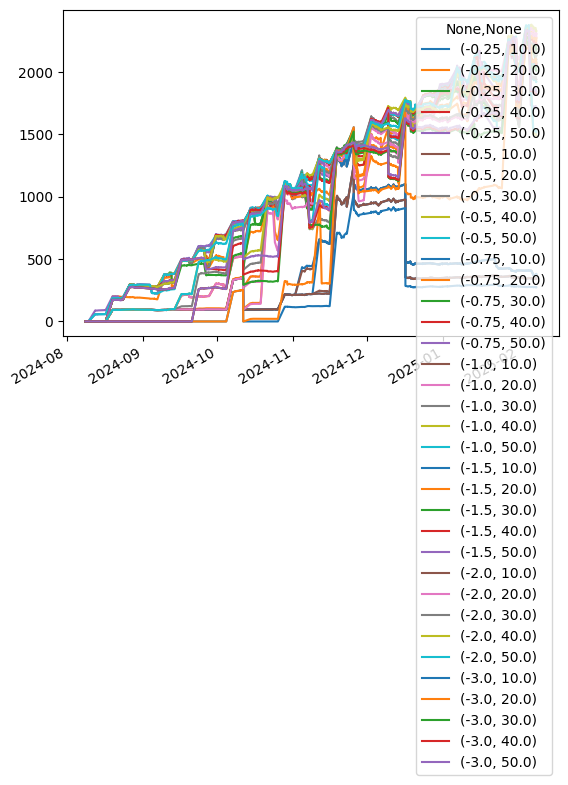

In [26]:
portfolio_df.plot()

In [27]:
portfolio_df.iloc[-1].sort_values()

-3.00  10.0     273.580002
-2.00  10.0     341.620003
-1.50  10.0     341.620003
-1.00  10.0     341.620003
-0.25  10.0     378.730003
-0.50  10.0     378.730003
-0.75  10.0     378.730003
-2.00  40.0    1492.894991
       50.0    1518.135000
-1.50  50.0    1709.584017
-3.00  40.0    1818.260010
       50.0    1839.210011
-0.50  50.0    1921.394006
-2.00  30.0    1941.074991
-3.00  30.0    2011.790005
-0.25  50.0    2041.764007
-1.00  50.0    2052.414021
-0.75  50.0    2056.474015
-1.50  40.0    2063.974010
-0.75  30.0    2069.619010
-3.00  20.0    2077.320000
-1.00  30.0    2099.159008
-0.25  30.0    2131.019011
-0.50  30.0    2136.289010
-1.50  30.0    2182.044008
-0.25  40.0    2183.004004
-0.50  40.0    2224.169033
-0.75  40.0    2224.169033
-1.50  20.0    2248.559983
-0.25  20.0    2266.455005
-0.75  20.0    2274.464993
-2.00  20.0    2287.245002
-0.50  20.0    2302.664990
-1.00  20.0    2309.554986
       40.0    2327.579041
Name: 2025-02-07 20:30:00+00:00, dtype: float64

Determine variation from SPY

<Axes: >

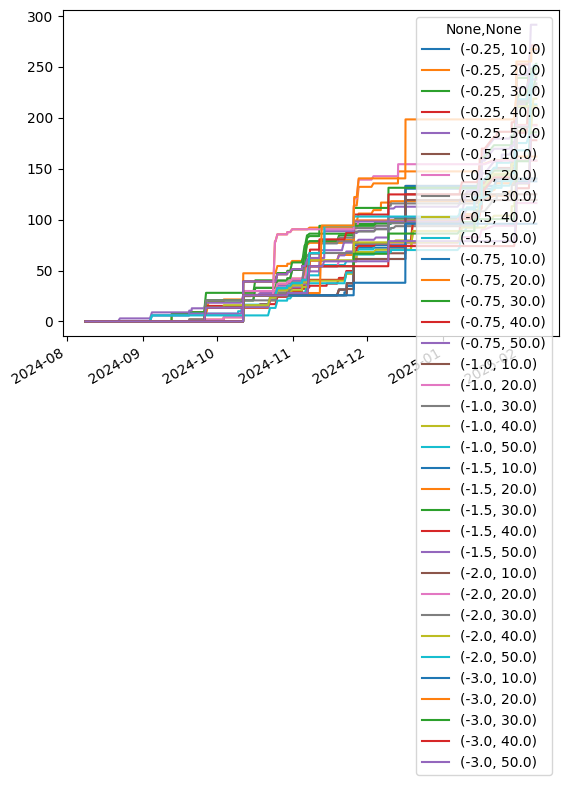

In [28]:
total_earnings_df.plot()

In [29]:
291 / 2600

0.11192307692307692

In [30]:
total_earnings_df.iloc[-1].sort_values()

-3.00  10.0     95.913452
-1.00  20.0    116.275405
-2.00  10.0    119.250252
-1.50  10.0    119.250252
-1.00  10.0    124.870251
-0.25  10.0    137.545256
-0.50  10.0    140.245255
-0.75  10.0    140.245255
-0.25  20.0    157.935301
-0.50  20.0    157.995200
-0.75  20.0    161.935199
-3.00  40.0    177.980091
       50.0    182.835091
       30.0    185.805677
-2.00  20.0    192.513788
-1.50  20.0    192.978791
-0.75  40.0    210.095991
-1.00  40.0    211.289390
-0.50  40.0    211.845991
       50.0    213.055340
-2.00  40.0    218.841417
       30.0    228.353981
-0.50  30.0    232.288179
-1.00  30.0    233.797234
-0.25  50.0    237.626450
       30.0    239.673174
       40.0    241.671479
-1.00  50.0    242.596380
-1.50  30.0    248.277251
-2.00  50.0    251.371424
-0.75  30.0    253.059072
       50.0    266.349038
-3.00  20.0    267.686592
-1.50  40.0    271.072364
       50.0    291.386104
Name: 2025-02-07 20:30:00+00:00, dtype: float64

~Use a z-score threshold of -1.00 and a sharpe-ratio threshold of 50.0.~

Use a z-score threshold of -1.50 and a sharpe-ratio threshold of 50.0.

In [33]:
def get_stock_selection(current_time, z_scores, z_score_threshold, sharpe_limit, should_print_outputs,
                        sp_500_data, money_available, current_holdings, rolling_sharpe):
    ordered_z_scores = z_scores.loc[current_time].sort_values()
    est = pytz.timezone("US/Eastern")
    eastern_time_index = current_time.astimezone(est)
    price_opens = sp_500_data["Open"]
    
    for sub_index in range(len(ordered_z_scores)):
        ticker_z_score = ordered_z_scores.iloc[sub_index]
        ticker = ordered_z_scores.index[sub_index]
        if ordered_z_scores.iloc[sub_index] < z_score_threshold and \
            price_opens.loc[current_time + timedelta(hours=1), ticker] < money_available and \
            ticker not in current_holdings and rolling_sharpe.loc[current_time, ticker] < sharpe_limit:
            current_holdings[ticker] = price_opens.loc[current_time + timedelta(hours=1), ticker]
            money_available -= price_opens.loc[current_time + timedelta(hours=1), ticker]
            if should_print_outputs:
                print(f"{eastern_time_index}: Bought {ticker} at a price of {current_holdings[ticker]}")

In [37]:
start_time = pd.to_datetime("2025-02-07 19:30:00+00:00")
current_holdings = dict()

get_stock_selection(start_time, z_scores, -1.50, 50.0, True, sp_500_data, 200.0, current_holdings,
                    rolling_sharpe)

2025-02-07 14:30:00-05:00: Bought PTC at a price of 168.83999633789062
2025-02-07 14:30:00-05:00: Bought F at a price of 9.244999885559082
2025-02-07 14:30:00-05:00: Bought KVUE at a price of 20.050800323486328
